In [50]:
path = r'D:\conda\image\20201219\204828_(18_67_78_93)(77_117)_35.6.txt'
f = open(path, 'r', errors='ignore')
lines = f.readlines()
line = []
for i, d in enumerate(lines):
    tmp = lines[i].split(' ')
    if (i == 320):
        tmep = tmp[0]
    if (i < 100 or len(tmp) < 100): continue
    line.append(tmp[:120])

In [51]:
import numpy as np

buf = np.array(line, dtype=float)
buf

array([[18.1, 18.4, 18.3, ..., 22.9, 22.4, 22.1],
       [18.3, 18.5, 18.6, ..., 23.6, 23.7, 23.4],
       [18.8, 19.1, 19.2, ..., 24.7, 24.3, 24.3],
       ...,
       [20.1, 20.2, 19.8, ..., 19.9, 20. , 20. ],
       [19.9, 20.2, 20.1, ..., 19.9, 20.1, 20. ],
       [20.1, 20.2, 19.7, ..., 19.9, 20. , 20. ]])

In [52]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp = np.sum(exp_a)
    print(exp_a, sum_exp)
#     y = (exp_a / sum_exp) - (exp_a / sum_exp) % 0.0000001
    y = exp_a / sum_exp
    
    return y

In [53]:
def minmax(a):
    c = np.max(a)
    y = (a / c) - (a / c) % 0.6
    
    return y

In [54]:
buf[10]

array([18.3, 18.6, 18.7, 18.4, 18.8, 18.8, 18.8, 18.8, 18.9, 18.9, 18.9,
       19. , 19.1, 18.9, 19.1, 19.1, 19.3, 19.4, 19.5, 19.3, 19.4, 19.4,
       19.3, 19.4, 19.4, 19.5, 19.9, 20.7, 20.8, 20.7, 20.7, 20.1, 19.7,
       19.5, 19.3, 19.3, 19.6, 19.5, 19.5, 19.5, 19.6, 19.6, 19.4, 19.6,
       19.6, 19.7, 19.6, 19.6, 19.9, 19.7, 19.8, 19.7, 19.8, 19.7, 19.8,
       19.7, 19.8, 19.9, 20. , 20.1, 20.7, 21.3, 21.1, 20.5, 19.2, 18.9,
       19. , 19.2, 19.6, 19.7, 19.4, 19. , 19.1, 19.1, 19.1, 19.1, 19.1,
       19.2, 19.2, 18.9, 19.2, 19. , 19. , 19. , 19. , 19. , 18.7, 18.8,
       18.6, 18.5, 18.4, 18.6, 18.9, 18.7, 20.1, 21.2, 22.3, 23.2, 23.2,
       23.1, 23.2, 23.4, 23.7, 24.1, 24.2, 25.1, 25. , 25.7, 25.6, 25.8,
       26.1, 26.7, 28.2, 28.9, 29.2, 29.5, 29.6, 29.6, 29.7, 29.8])

In [55]:
y = minmax(buf)
y[10]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.6, 0.6])

In [14]:
import pandas as pd

df = pd.DataFrame(y)
df.to_csv("sample.csv", header=False, index=False)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = RobusterScaler()
# scaler = MaxAbsScaler()

scaler.fit(line)
x_train = scaler.transform(line)
x_train

array([[1.        , 0.99180328, 0.96825397, ..., 1.        , 1.        ,
        1.        ],
       [0.98360656, 0.98360656, 0.92063492, ..., 1.        , 0.97674419,
        1.        ],
       [0.96721311, 0.99180328, 0.91269841, ..., 0.97777778, 0.97674419,
        0.97619048],
       ...,
       [0.05737705, 0.03278689, 0.05555556, ..., 0.71111111, 0.69767442,
        0.71428571],
       [0.        , 0.02459016, 0.        , ..., 0.66666667, 0.72093023,
        0.71428571],
       [0.00819672, 0.        , 0.03968254, ..., 0.68888889, 0.69767442,
        0.69047619]])

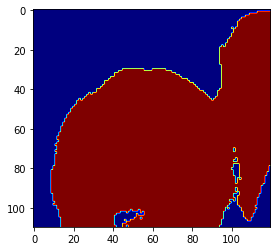

In [56]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
# buf = np.array(x_train, dtype=float)
ax1.imshow(y,cmap = 'jet',animated = True)